<a href="https://colab.research.google.com/github/lloppy/noonecantsee/blob/main/Titanic2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

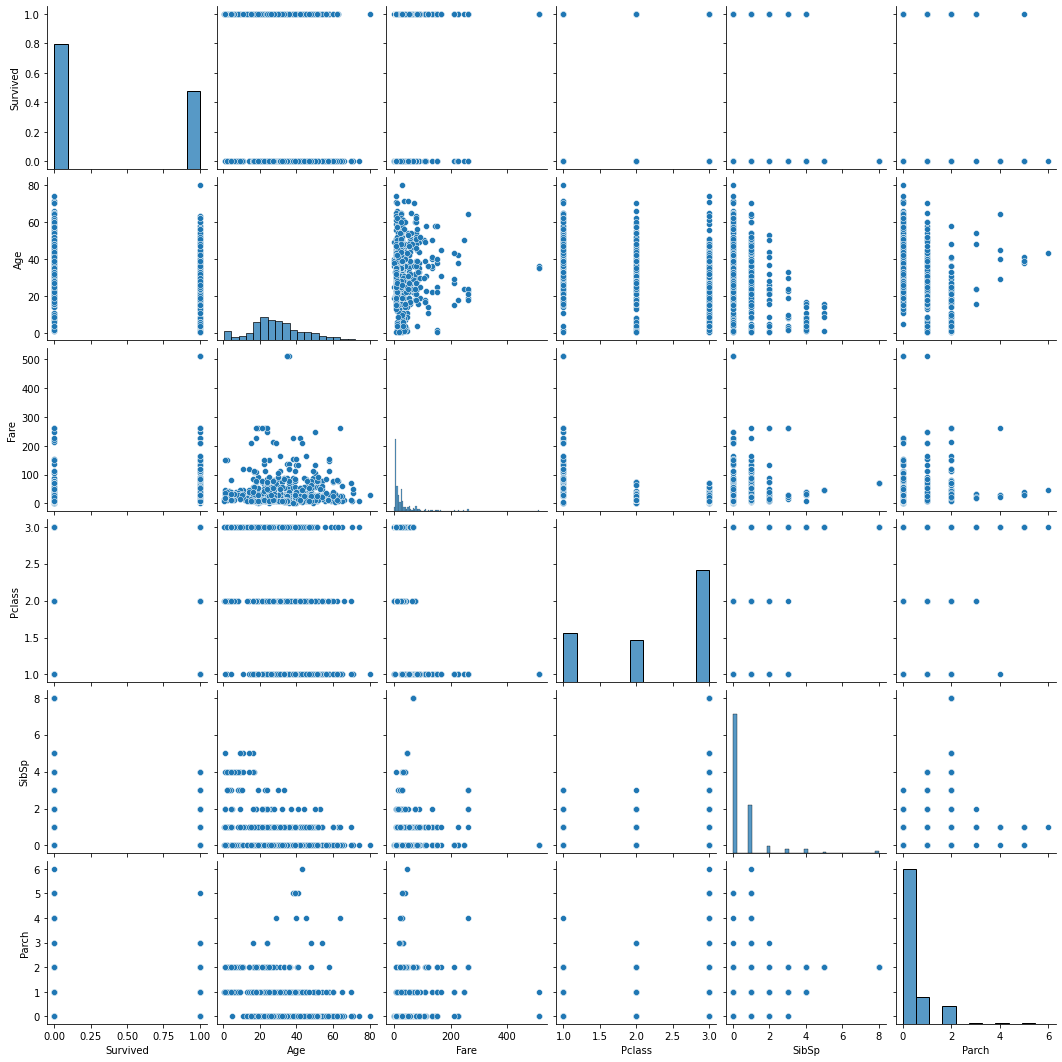

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 


url = 'https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/titanic_train.csv'
titanic_train = pd.read_csv(url)


sns.pairplot(titanic_train[['Survived', 'Age', 'Fare', 
                       'Pclass', 'Sex', 'SibSp', 
                       'Parch', 'Embarked']]);

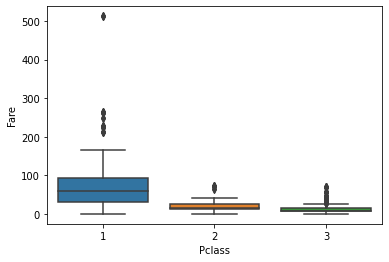

In [ ]:
sns.boxplot(x='Pclass', y='Fare', data=titanic_train);


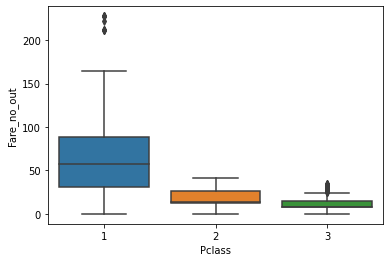

In [ ]:
titanic_train['Fare_no_out'] = titanic_train['Fare']
fare_pclass1 = titanic_train[titanic_train['Pclass'] == 1]['Fare']
fare_pclass2 = titanic_train[titanic_train['Pclass'] == 2]['Fare']
fare_pclass3 = titanic_train[titanic_train['Pclass'] == 3]['Fare']
fare_pclass1_no_out = fare_pclass1[(fare_pclass1 - 
                                    fare_pclass1.mean()).abs()  
                                   < 2 * fare_pclass1.std()]
fare_pclass2_no_out = fare_pclass2[(fare_pclass2 - 
                                    fare_pclass2.mean()).abs()  
                                   < 2 * fare_pclass2.std()]
fare_pclass3_no_out =  fare_pclass3[(fare_pclass3 - 
                                    fare_pclass3.mean()).abs() 
                                   < 2 * fare_pclass3.std()]
titanic_train['Fare_no_out'] = fare_pclass1_no_out.append(fare_pclass2_no_out)\
                                             .append(fare_pclass3_no_out)


sns.boxplot(x='Pclass', y='Fare_no_out', data=titanic_train);


In [ ]:
pd.crosstab(titanic_train['Sex'], titanic_train['Survived'])


Survived,0,1
Sex,,
female,81,233
male,468,109


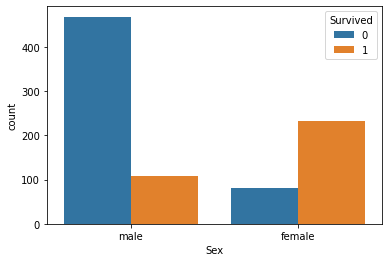

In [ ]:
sns.countplot(x="Sex", hue="Survived", data=titanic_train);


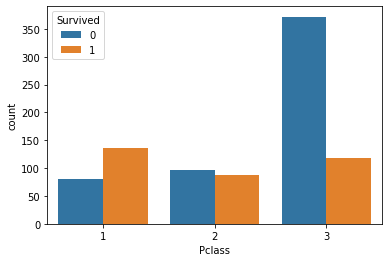

In [ ]:
sns.countplot(x="Pclass", hue="Survived", data=titanic_train);


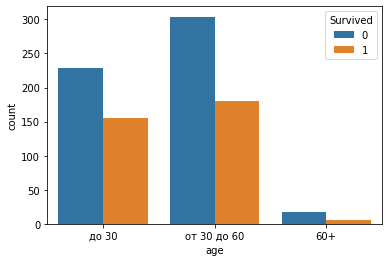

In [ ]:
titanic_train['age'] = titanic_train['Age'].apply(lambda age: 'до 30' if age < 30 
                                            else '60+' if age > 60 else 'от 30 до 60');

sns.countplot(x='age', hue='Survived', data=titanic_train);
